# Los Angeles Restaurants: Market Research

We opened a small robort-run cafe in Los Angeles, and will be conducting market research for investors.

We will analyze open-source data on restaurants in LA, which will give us insight of the current market conditions for robot-run cafes. We will investigate various aspects of the restaurants in our dataset, and make conclusions and/or conjectures.

Our analysis will be synthezied into a presentation ready to be shared with investors.

# Table of Contents
[1 Open the data file and have a look at the general information](#1heading)  
&emsp;[1.1 Conclusion](#1.1heading)  
[2 Data preprocessing](#2heading)  
&emsp;[2.1 Processing missing values](#2.1heading)  
&emsp;[2.2 Data type replacement](#2.2heading)  
&emsp;[2.3 Processing duplicates](#2.3heading)  
[3 Data Analysis](#3heading)  
&emsp;[3.1 Establishment Types Proportions](#3.1heading)  
&emsp;[3.2 Chain vs Nonchain Proportions](#3.2heading)  
&emsp;[3.3 Which type of establishment is typically a chain?](#3.3heading)  
&emsp;[3.4 What characterizes chains?](#3.4heading)  
&emsp;[3.5 Average number of seats per establishment type](#3.5heading)  
&emsp;[3.6 Top Ten Street by Number of Restaurants](#3.6heading)  
&emsp;[3.7 Streets with only One Establishment](#3.7heading)  
&emsp;[3.8 Streets with lots of establishments and their amount of seats](#3.8heading)  
[4 Overall Conclusion](#4heading)   
[5 Presentation](#5heading)  

<div class="alert alert-success">
<b>Reviewer's comment v1:</b>
    
Great that you added additional information about project objective. 

<a id='1heading'></a>

## Open the data files and have a look at the general information

In [5]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import math as mt
from math import factorial
import datetime as dt
import seaborn as sns
import plotly.express as px
from plotly import graph_objects as go
from scipy import stats as st
from functools import reduce
import re

In [7]:
# Read file
rest_data = pd.read_csv('/datasets/rest_data_us.csv')

In [8]:
# Displaying rest_data dataframe and the data info
display(rest_data.head())
rest_data.info()

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


In [4]:
#Renaming columns
rest_data.rename(columns={'object_name': 'establishment_name'}, inplace=True)
rest_data.rename(columns={'object_type': 'establishment_type'}, inplace=True)
rest_data.rename(columns={'number': 'number_seats'}, inplace=True)

<div class="alert alert-info">
    
rest_data dataframe contains 6 columns: **id, object_name, address, chain, object_type, and number**
- **id** — establishment identifier
- **object_name** — establishment name
- **chain** — if establishment is a chain (TRUE/FALSE)
- **object_type** — establishment type
- **address** — address
- **number** — number of seats

Total of 9651 rows. Chain column is missing 3 values. Data types need to be updated.
</div>

<a id='2heading'></a>

## Data preprocessing

<a id='2.1heading'></a>

### Processing missing values

In [5]:
# Count of nulls for rest_data
print('Total Rows:', len(rest_data))
rest_data.isnull().sum()

Total Rows: 9651


id                    0
establishment_name    0
address               0
chain                 3
establishment_type    0
number_seats          0
dtype: int64

In [6]:
# Proportion of nulls
proportion = rest_data.isnull().sum()*100/len(rest_data)
proportion

id                    0.000000
establishment_name    0.000000
address               0.000000
chain                 0.031085
establishment_type    0.000000
number_seats          0.000000
dtype: float64

In [7]:
# Dropping nulls
rest_data = rest_data.dropna()

In [8]:
# Confirming deletion of nulls
print('Total Rows:', len(rest_data))
rest_data.isnull().sum()

Total Rows: 9648


id                    0
establishment_name    0
address               0
chain                 0
establishment_type    0
number_seats          0
dtype: int64

<div class="alert alert-info">
We've removed 3 rows from our dataset where 'chain' was null since the dataset is large enough. Those 3 rows accounted for 0.03% of our data.
</div>

<a id='2.2heading'></a>

### Data type replacement

In [9]:
# Check rest_data dtypes
rest_data.dtypes

id                     int64
establishment_name    object
address               object
chain                 object
establishment_type    object
number_seats           int64
dtype: object

In [10]:
# Change dtypes
rest_data['chain'] = rest_data['chain'].astype('bool')
rest_data['establishment_type'] = rest_data['establishment_type'].astype('category')

In [11]:
# Confirm new rest_data dtypes
rest_data.dtypes

id                       int64
establishment_name      object
address                 object
chain                     bool
establishment_type    category
number_seats             int64
dtype: object

<div class="alert alert-info">
We've successfully updated our data types.
</div>

<a id='2.3heading'></a>

### Processing duplicates

In [12]:
rest_data.head()

,id,establishment_name,address,chain,establishment_type,number_seats
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


In [13]:
# Making new column for future use
rest_data['street_only'] = rest_data['address']

In [14]:
# Columns to only contain letters and numbers, to better pinpoint duplicates
rest_data['establishment_name'] = rest_data['establishment_name'].str.replace('[^\dA-Za-z]', '')
rest_data['address'] = rest_data['address'].str.replace('[^\dA-Za-z]', '')
rest_data.head()

,id,establishment_name,address,chain,establishment_type,number_seats,street_only
0,11786,HABITATCOFFEESHOP,3708NEAGLEROCKBLVD,False,Cafe,26,3708 N EAGLE ROCK BLVD
1,11787,REILLYS,100WORLDWAY120,False,Restaurant,9,100 WORLD WAY # 120
2,11788,STREETCHURROS,6801HOLLYWOODBLVD253,False,Fast Food,20,6801 HOLLYWOOD BLVD # 253
3,11789,TRINITIECHOPARK,1814WSUNSETBLVD,False,Restaurant,22,1814 W SUNSET BLVD
4,11790,POLLEN,2100ECHOPARKAVE,False,Restaurant,20,2100 ECHO PARK AVE


In [15]:
# Counting raw duplicates
print('Total raw duplicates:', rest_data.duplicated().sum())

Total raw duplicates: 0


In [16]:
# Obtaining duplicates based on 'establishment_name' and 'address'
rest_duplicates = rest_data[rest_data.duplicated(subset=['establishment_name', 'address'], keep=False)].sort_values(by='establishment_name')
display(rest_duplicates.head())
print('Total subset duplicates:', rest_data.duplicated(subset=['establishment_name', 'address']).sum())

,id,establishment_name,address,chain,establishment_type,number_seats,street_only
2308,14094,23RDSTCAFE,936W23RDST,False,Restaurant,32,936 W 23RD ST
7454,19240,23RDSTCAFE,936W23RDST,False,Restaurant,35,936 W 23RD ST
7063,18849,5STARMARKET,2700WVERNONAVE,False,Restaurant,1,2700 W VERNON AVE
3561,15347,5STARMARKET,2700WVERNONAVE,False,Restaurant,28,2700 W VERNON AVE
7772,19558,AUNTIEANNES,3650WMLKBLVD268A,True,Restaurant,13,3650 W MLK BLVD # #268A


Total subset duplicates: 60


In [17]:
# Dataframe of 60 duplicate rows to exclude - will delete duplicates with lower amount of seats
rest_duplicates_exclude = rest_duplicates.sort_values('number_seats').drop_duplicates(subset=['establishment_name', 'address'], keep='first')
rest_duplicates_exclude.head()

,id,establishment_name,address,chain,establishment_type,number_seats,street_only
7063,18849,5STARMARKET,2700WVERNONAVE,False,Restaurant,1,2700 W VERNON AVE
8414,20200,CHINAEXPRESS,8522SWESTERNAVEB,True,Fast Food,1,8522 S WESTERN AVE # #B
6228,18014,EDIBLEARRANGEMENTS,6100NFIGUEROASTSTEB,True,Restaurant,2,6100 N FIGUEROA ST STE #B
7211,18997,DOMINOSPIZZA,3309WPICOBLVD,True,Pizza,2,3309 W PICO BLVD
4464,16250,CHICKENNROLL,11111WILMINGTONAVE,False,Restaurant,2,11111 WILMINGTON AVE


In [18]:
#Removing duplicates from main dataframe
rest_data = rest_data[~rest_data.id.isin(rest_duplicates_exclude.id)]
rest_data.head()

,id,establishment_name,address,chain,establishment_type,number_seats,street_only
0,11786,HABITATCOFFEESHOP,3708NEAGLEROCKBLVD,False,Cafe,26,3708 N EAGLE ROCK BLVD
1,11787,REILLYS,100WORLDWAY120,False,Restaurant,9,100 WORLD WAY # 120
2,11788,STREETCHURROS,6801HOLLYWOODBLVD253,False,Fast Food,20,6801 HOLLYWOOD BLVD # 253
3,11789,TRINITIECHOPARK,1814WSUNSETBLVD,False,Restaurant,22,1814 W SUNSET BLVD
4,11790,POLLEN,2100ECHOPARKAVE,False,Restaurant,20,2100 ECHO PARK AVE


<div class="alert alert-info">
We've removed 60 duplicate rows from our dataset where establishment name and address were the same.
</div>

<a id='3heading'></a>

## Data Analysis

In [19]:
# Setting seaborn color palette
plt.style.use('ggplot')

<a id='3.1heading'></a>

### Establishment Types Proportions

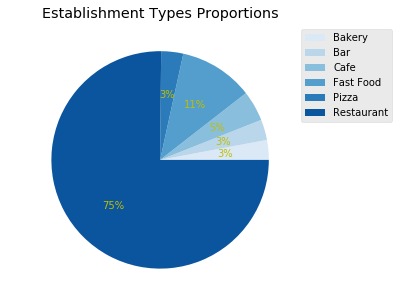

In [20]:
# Pie chart showing proportions of the various types of establishments
colors = sns.color_palette("Blues")

rest_data.groupby('establishment_type').size().plot(kind='pie',
                                                    labeldistance=None,
                                                    colors = colors,
                                                    autopct='%1.0f%%',  textprops={'color':"y"},
                                                    figsize=(10, 5)
                                                   )
plt.title('Establishment Types Proportions')
plt.ylabel(' ')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

<div class="alert alert-info">
Our pie chart shows that a whopping 75% of establishments are restaurants. Fast food places account for 11%, and cafes account for 5%. Bakeries, pizza joints, and bars account for the rest, at 3% each.
</div>

<a id='3.2heading'></a>

### Chain vs Nonchain Proportions

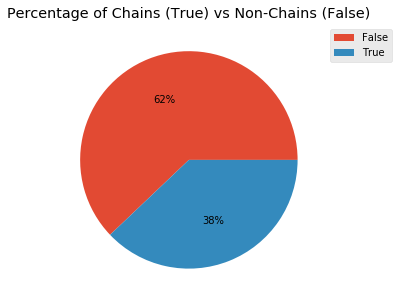

In [21]:
# Visualizing Chain vs Non-Chain
rest_data.groupby('chain').size().plot(kind='pie',
                                       labeldistance=None, 
                                       autopct='%1.0f%%',
                                       figsize=(10, 5)
                                      )
plt.title('Percentage of Chains (True) vs Non-Chains (False)')
plt.ylabel(' ')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

<div class="alert alert-info">
Our pie chart shows that 38% of establishments in our dataset happen to be chains. The other 62% are not chains.
</div>

<a id='3.3heading'></a>

### Which type of establishment is typically a chain?

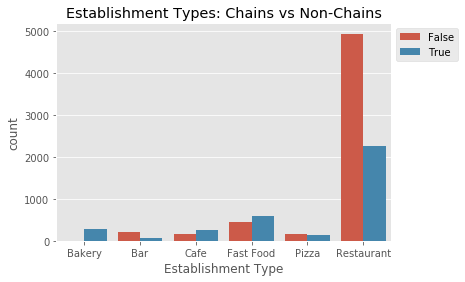

In [22]:
# Visualizing count for types of establishments, and chains
sns.countplot(rest_data['establishment_type'], hue=rest_data['chain'])
plt.title('Establishment Types: Chains vs Non-Chains')
plt.xlabel('Establishment Type')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

<div class="alert alert-info">
Fast food establishments and cafes are typically chains. Restaurants and bars are mostly non-chains. There are only chain bakeries in the area. Might be an opportunity to enter a new market.

</div>

<a id='3.4heading'></a>

### What characterizes chains?

In [23]:
# Pivot table containing chain and non_chain avg. number of seats per establishment
seats_pivot = rest_data.pivot_table(index=['chain', 'establishment_type', 'establishment_name'], values='number_seats', aggfunc='mean').reset_index(drop=False)
display(seats_pivot.head())
print('Length:', len(seats_pivot))

# Pivot containing amount of establishments by name
count_pivot = rest_data.groupby('establishment_name')['id'].count().reset_index(drop=False)
display(count_pivot.head())
print('Length:', len(count_pivot))

,chain,establishment_type,establishment_name,number_seats
0,False,Bar,4100BAR,3.0
1,False,Bar,69THFLOORBAR,28.0
2,False,Bar,ACCOMPLICEBARLITTLEFATTY,47.0
3,False,Bar,AHMANSONGROUNDGRANDBAR,14.0
4,False,Bar,AHMANSONWESTBAR,43.0


Length: 8589


,establishment_name,id
0,101ASIANKITCHENINC,1
1,101COFFEESHOP,1
2,10BELOWICECREAM,1
3,10E,1
4,161STREETPIZZERIA,1


Length: 8564


In [24]:
# Merging both pivots
cumulative_pivot = pd.merge(seats_pivot, count_pivot, on='establishment_name')
display(cumulative_pivot.head())
print('Length:', len(cumulative_pivot))

,chain,establishment_type,establishment_name,number_seats,id
0,False,Bar,4100BAR,3.0,1
1,False,Bar,69THFLOORBAR,28.0,1
2,False,Bar,ACCOMPLICEBARLITTLEFATTY,47.0,1
3,False,Bar,AHMANSONGROUNDGRANDBAR,14.0,1
4,False,Bar,AHMANSONWESTBAR,43.0,1


Length: 8589


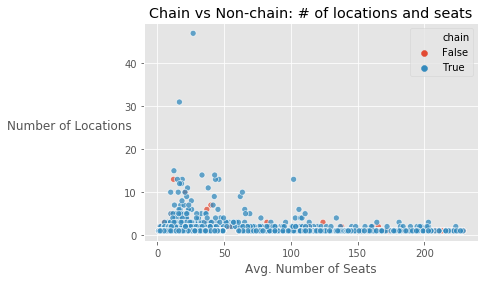

In [25]:
# scatterplot on id and number_seats, with chain as hue
sns.scatterplot(data=cumulative_pivot, x='number_seats', y='id', hue='chain', alpha=0.75)
plt.title('Chain vs Non-chain: # of locations and seats')
plt.xlabel('Avg. Number of Seats')
plt.ylabel('Number of Locations                          ', rotation=0)
plt.show()

<div class="alert alert-info">
Since we have a lot of data points, our chain values are in the way of our non-chain values. We will expand to multiple plots showing difference between chains/non-chains and establishments types.
</div>

In [26]:
# Indexing data chain and non-chain
cumulative_data_chain = cumulative_pivot.loc[cumulative_pivot['chain'] == True]
cumulative_data_non_chain = cumulative_pivot.loc[cumulative_pivot['chain'] == False]

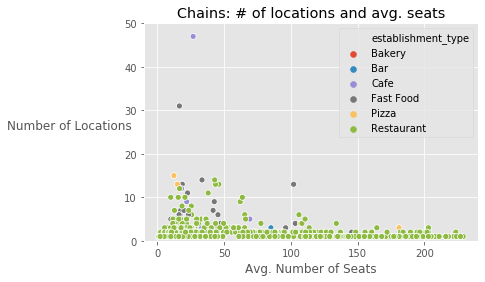

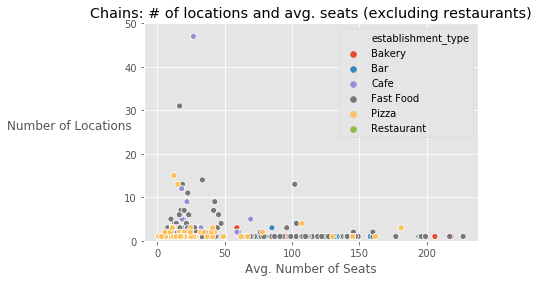

In [27]:
# Scatterplot showing avg. number of seats by establishment_name number of locations for chains
sns.scatterplot(data=cumulative_data_chain, x='number_seats', y='id', color='blue', hue='establishment_type')
plt.ylim( [ 0, 50 ] )
plt.title('Chains: # of locations and avg. seats')
plt.xlabel('Avg. Number of Seats')
plt.ylabel('Number of Locations                          ', rotation=0)
plt.show()

# Remove restaurants from second visualization
cumulative_data_chain_2 = cumulative_data_chain.loc[cumulative_data_chain['establishment_type'] != 'Restaurant']

sns.scatterplot(data=cumulative_data_chain_2, x='number_seats', y='id', color='blue', hue='establishment_type')
plt.ylim( [ 0, 50 ] )
plt.title('Chains: # of locations and avg. seats (excluding restaurants)')
plt.xlabel('Avg. Number of Seats')
plt.ylabel('Number of Locations                          ', rotation=0)
plt.show()

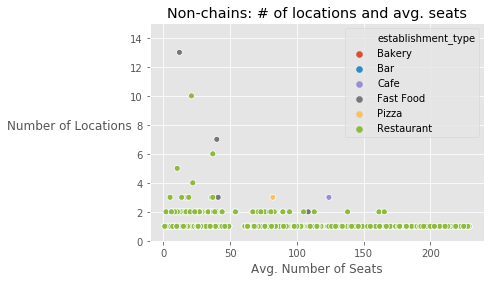

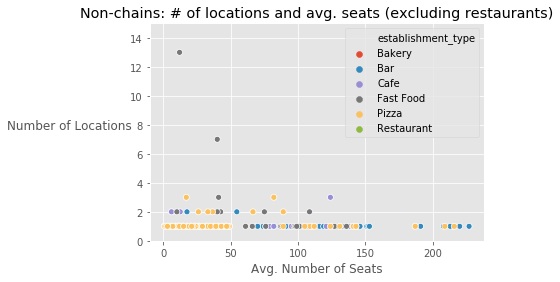

In [28]:
# Scatterplot showing avg. number of seats by establishment_name number of locations for non-chains
sns.scatterplot(data=cumulative_data_non_chain, x='number_seats', y='id', hue='establishment_type')
plt.ylim( [ 0, 15 ] )
plt.title('Non-chains: # of locations and avg. seats')
plt.xlabel('Avg. Number of Seats')
plt.ylabel('Number of Locations                             ', rotation=0)
plt.show()

# Remove restaurants from second visualization
cumulative_data_non_chain_2 = cumulative_data_non_chain.loc[cumulative_data_non_chain['establishment_type'] != 'Restaurant']

sns.scatterplot(data=cumulative_data_non_chain_2, x='number_seats', y='id', color='blue', hue='establishment_type')
plt.ylim( [ 0, 15 ] )
plt.title('Non-chains: # of locations and avg. seats (excluding restaurants)')
plt.xlabel('Avg. Number of Seats')
plt.ylabel('Number of Locations                             ', rotation=0)
plt.show()

<div class="alert alert-info">
<b>Main finding:</b>

- According to our visualizations, chains usually have more number of locations and slightly higher number of seats.
&emsp;  
    
<b>Other findings:</b>

- There are a lot of establishment names that only have 1 location in our dataset, which is the case for both chains and non-chains.
- Most restaurant names have 4 or less locations in the dataset, and have a full array of avg. number of seats
- Pizza places usually have a smaller amount of seating
- Fast food places and cafes are usually chains
- Chain bakeries usually have a lot of seating capacity
    
</div>

<a id='3.5heading'></a>

### Average number of seats per establishment type

In [29]:
# Obtaining average number of seats per establishment type
seats_by_type = rest_data.groupby('establishment_type')['number_seats'].mean().sort_values(ascending=True).reset_index(drop=False)
seats_by_type

,establishment_type,number_seats
0,Bakery,21.773852
1,Cafe,24.986175
2,Pizza,28.796178
3,Fast Food,31.820585
4,Bar,44.767123
5,Restaurant,48.150014


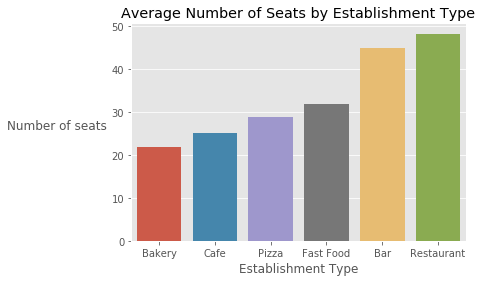

In [30]:
# Plotting average number of seats by establishment type
sns.barplot(x = 'establishment_type',
            y = 'number_seats',
            data = seats_by_type,
            order=['Bakery', 'Cafe', 'Pizza', 'Fast Food', 'Bar', 'Restaurant'])
plt.title('Average Number of Seats by Establishment Type')
plt.xlabel('Establishment Type')
plt.ylabel('Number of seats                          ', rotation=0)
plt.show()

<div class="alert alert-info">
Restaurants and bars on average have the greatest number of seats, surpassing the 40 average seats mark.
</div>

<a id='3.6heading'></a>

### Top Ten Street by Number of Restaurants

pip install pyap  
import pyap  

In [31]:
# Function to remove digits from list
def remove(list):
    pattern = '[0-9]'
    list = [re.sub(pattern, '', i) for i in list]
    return list

In [32]:
# Adding street column, by removing digits from address column
rest_data['street_only'] = remove(rest_data['street_only'])
rest_data.head()

,id,establishment_name,address,chain,establishment_type,number_seats,street_only
0,11786,HABITATCOFFEESHOP,3708NEAGLEROCKBLVD,False,Cafe,26,N EAGLE ROCK BLVD
1,11787,REILLYS,100WORLDWAY120,False,Restaurant,9,WORLD WAY #
2,11788,STREETCHURROS,6801HOLLYWOODBLVD253,False,Fast Food,20,HOLLYWOOD BLVD #
3,11789,TRINITIECHOPARK,1814WSUNSETBLVD,False,Restaurant,22,W SUNSET BLVD
4,11790,POLLEN,2100ECHOPARKAVE,False,Restaurant,20,ECHO PARK AVE


Regex example
rest_data['street'] = rest_data['address'].str.extract(r'^((?:\S+\s+){2}\S+).*', expand=False)
rest_data

In [33]:
# Obtaining average number of seats per establishment type
restaurants_in_streets = rest_data.groupby('street_only')['id'].count().sort_values(ascending=False).reset_index(drop=False)

#R emoving 2 streets that are not accurate - they include many streets combined into one
restaurants_in_streets_top_10 = restaurants_in_streets.head(12).query('id != ("319", "146")').reset_index(drop=True)

restaurants_in_streets_top_10

,street_only,id
0,W SUNSET BLVD,295
1,W PICO BLVD,287
2,HOLLYWOOD BLVD,167
3,WILSHIRE BLVD,161
4,S VERMONT AVE,147
5,SANTA MONICA BLVD,144
6,BEVERLY BLVD,134
7,S FIGUEROA ST,133
8,MELROSE AVE,128
9,S WESTERN AVE,126


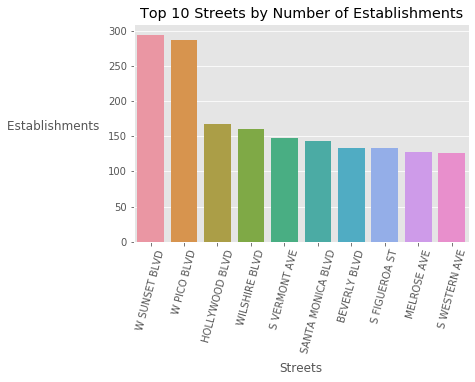

In [34]:
# Plotting top ten streets by Number of Establishments
sns.barplot(x = 'street_only',
            y = 'id',
            data = restaurants_in_streets_top_10
           )
plt.title('Top 10 Streets by Number of Establishments')
plt.xlabel('Streets')
plt.xticks(rotation=75)
plt.ylabel('Establishments                          ', rotation=0)
plt.show()

<div class="alert alert-info">
Our bar chart shows us the Top 10 Streets in terms of number of establishments. W SUNSET BLVD and W PICO BLVD surpass the rest of the top 10 streets around twice their size.
<div>

<a id='3.7heading'></a>

### Streets with only One Establishment

In [35]:
# Dataframe from section 3.6 which we'll work with
restaurants_in_streets.head()

,street_only,id
0,W TH ST,319
1,W SUNSET BLVD,295
2,W PICO BLVD,287
3,HOLLYWOOD BLVD,167
4,WILSHIRE BLVD,161


In [36]:
# Categorizing rows by # of establishments in streets
def street_establishments(id):
    if id < 2:
        return '1'
    if id <= 3:
        return '2-3'
    if id <= 6:
        return '4-6'
    if id <= 20:
        return '6-20'
    if id <= 50:
        return '21-50'
    if id <= 150:
        return '51-150'
    if id <= 319:
        return '150-319'

restaurants_in_streets['street_establishments'] = restaurants_in_streets['id'].apply(street_establishments)
restaurants_in_streets.head()

,street_only,id,street_establishments
0,W TH ST,319,150-319
1,W SUNSET BLVD,295,150-319
2,W PICO BLVD,287,150-319
3,HOLLYWOOD BLVD,167,150-319
4,WILSHIRE BLVD,161,150-319


In [37]:
# Querying streets with only one establishment # global variable used in visualization cell calculation
one_restaurant_streets = restaurants_in_streets.query('id in ("1")').reset_index(drop=True)
one_restaurant_streets.head()

,street_only,id,street_establishments
0,AVENUE OF THE STARS STE PK,1,1
1,CAHUENGA BLVD W STE,1,1
2,N CENTRAL AVE # #,1,1
3,N HOBART BLVD,1,1
4,BARTON AVE FL ND,1,1


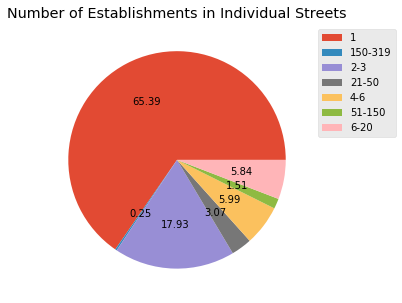

Streets with 1 establishment: 65.39%


In [38]:
# Visualizing the amount of establishments in LA streets
restaurants_in_streets.groupby('street_establishments').size().plot(kind='pie',
                                                labeldistance=None,
                                                autopct='%.2f',
                                                figsize=(10, 5)
                                                )
plt.title('Number of Establishments in Individual Streets')
plt.ylabel(' ')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

# Percentage of streets with 1 establishment
print('Streets with 1 establishment: {:.2%}'.format(len(one_restaurant_streets)/len(restaurants_in_streets)))

<div class="alert alert-info">
<b>Findings:</b>

- To our surprise, <b>65.39%</b> of streets in our dataset only have one establishment
- <b>17.93%</b> of streets have 2-3 establishments
- <b>6.99%</b> of streets have 4-6 establishments
- <b>5.84%</b> of streets have 6-20 establishments
- <b>3.07%</b> of streets have 21-50 establishments
- <b>1.51%</b> of streets have 51-150 establishments
- <b>0.25%</b> of streets have 6-20 establishments

<div>

<a id='3.8heading'></a>

### Streets with lots of establishments and their amount of seats

In [39]:
# Creating dataframe containing indvidual streets and their establishments' average number of seats
avg_seats_in_streets = rest_data.groupby('street_only')['number_seats'].mean().sort_values(ascending=False).reset_index(drop=False)
avg_seats_in_streets.rename(columns={'number_seats': 'number_seats_average'}, inplace=True)
avg_seats_in_streets.head()

,street_only,number_seats_average
0,MULHOOLAND DR,229.0
1,MOUNTAIN GATE DR,229.0
2,S FLOWER ST ST,227.0
3,S BURLINGAME AVE,226.0
4,NAUD ST,225.0


In [40]:
# Merging new dataframe with dataframe created in section 2.6
street_data = pd.merge(restaurants_in_streets, avg_seats_in_streets, on='street_only')
street_data['number_seats_average'] = street_data['number_seats_average'].astype('int')
street_data.head()

,street_only,id,street_establishments,number_seats_average
0,W TH ST,319,150-319,49
1,W SUNSET BLVD,295,150-319,51
2,W PICO BLVD,287,150-319,41
3,HOLLYWOOD BLVD,167,150-319,53
4,WILSHIRE BLVD,161,150-319,62


In [41]:
# Querying between establishments with many seats vs few seats
street_data_many_est = street_data.query('street_establishments in ("1", "2-3", "4-6")')
street_data_few_est = street_data.query('street_establishments not in ("1", "2-3", "4-6")')

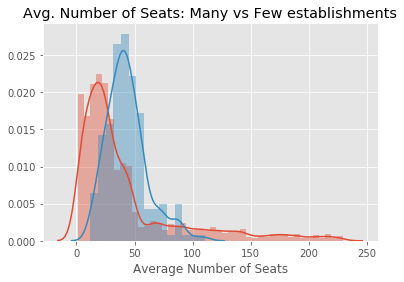

In [42]:
#Plotting density histograms for both queries
sns.distplot(street_data_many_est['number_seats_average']) # Red
sns.distplot(street_data_few_est['number_seats_average']) # Blue

plt.title('Avg. Number of Seats: Many vs Few establishments')
plt.xlabel('Average Number of Seats')

plt.show()

<div class="alert alert-info">
Our red distribution shows that streets that contain many establishments, on average, have a higher amount of seats than streets with few establishments. The distribution of seats for streets with many establishments almost represents a normal distribution, while the other distribution contains a lot of outliers that skew the distribution to the right.
</div>

<a id='4heading'></a>

## Overall Conclusion

The the help of the data provided and visualizations made, we found out that a whopping 75% of establishments are restaurants. Fast food places account for 11%, and cafes account for 5%. Bakeries, pizza joints, and bars account for the rest, at 3% each

We found out that 38% of establishments in our dataset happen to be chains. The other 62% are not chains. Fast food establishments and cafes are typically chains. Restaurants and bars are mostly non-chains. There are only chain bakeries in the area.

Restaurants and bars on average have the greatest number of seats, surpassing the 40 average seats mark.

About 85% of streets have 3 or less establishments present, which is a low amount of esablishments. Streets that contain many establishments, on average, have a higher amount of seats than streets with few establishments

There are **two recommendations** we can provide based on our given data.
- Open a chain restaurant with a lot of seating capacity (around 50), perhaps in a street with few establishments
- Open a non-chain bakery with a moderate amount of seating capacity (around 20), in a popular street with a lot of establishments lacking a bakery

Note: there are ZERO non-chain bakeries present in our dataset. Non-chain bakery can boast of sourcing fresh and local ingredients.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Great conclusions with main points and recommendations.

<a id='5heading'></a>

## Presentation

Presentation: <https://docs.google.com/presentation/d/1M-ciMgB2PcWMkRDeyrHOoOUd_AH-GN795hgFfA1w66o/edit?usp=sharing> 